## Line search methods



Objective function:

    $$w^* = arg \min_w ||Xw - y||^2$$
    
We chose an arbitrary value $$\alpha$$ and and we would like a better estimation of $$\alpha$$ that minimizes the objective function.

We will describe 4 ways in this notebook:
    - The naive approach (divide by 2)
    - The bisection method
    - Quadratic Interpolation

    
    

In [231]:
def f(w, X, y):
    yXw = y * X.dot(w).ravel()

    # Calculate the function value
    loss = np.sum(np.log(1. + np.exp(-yXw)))
    
    return loss

def g(w, X, y):
    yXw = y * X.dot(w).ravel()
    res = - y / (1. + np.exp(yXw))
    g = X.T.dot(res)
    
    return g[0]

array([ 35.12044384])

## The dataset

We first generate a dataset with features obtained from the normal distribution with noisy sine target values.

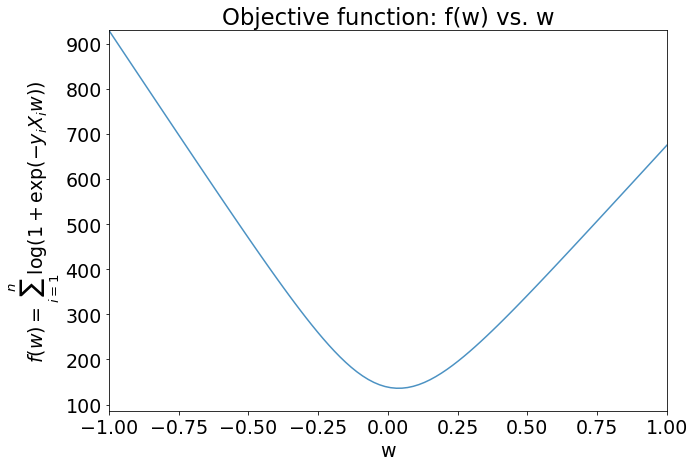

In [313]:
%matplotlib inline

import numpy as np
import pylab as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rc('font', size=19)  
from sklearn.metrics.pairwise import pairwise_kernels

np.random.seed(2)

## 1. Construct training data
n, d = 200, 1
X = np.sort(np.random.randn(n, 1)*1.5 + 3, axis=0) + 5
y = np.ones(n)
y[:n/2] = -1

points = np.linspace(-1,1.0,100)
nPoints = points.size
fw = np.zeros(points.size)
w = np.zeros(points.size)

for i in range(nPoints):
    w[i] = points[i]
    fw[i] = f(w[i], X, y)
   

# 3. Plot Dataset
xmin, xmax = np.min(w), np.max(w)
ymin, ymax = np.min(fw)-50, np.max(fw)+.2
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")
plt.title("Objective function: f(w) vs. w")
plt.plot(w, fw, '-', alpha=0.8)
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
#plt.legend(loc="lower right")
plt.show()



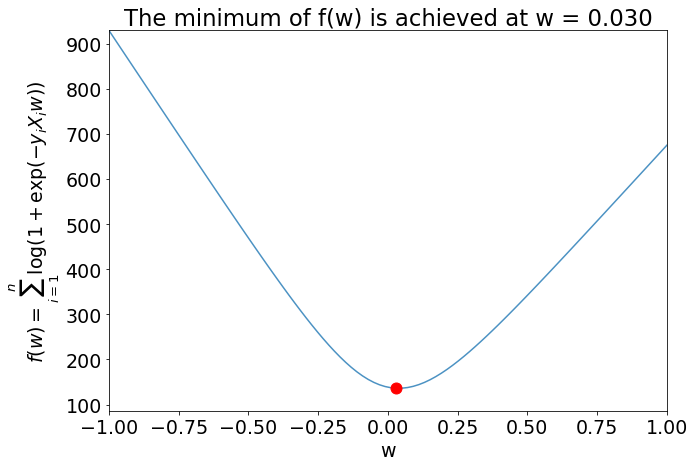

In [318]:
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

plt.plot(w, fw, '-', alpha=0.8)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)
plt.title("The minimum of f(w) is achieved at w = %.3f" % w[i])
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
#plt.legend(loc="lower right")
plt.show()

## Linear Regression

Let's first plot the decision boundary made by fitting the standard linear regression model on the training data.

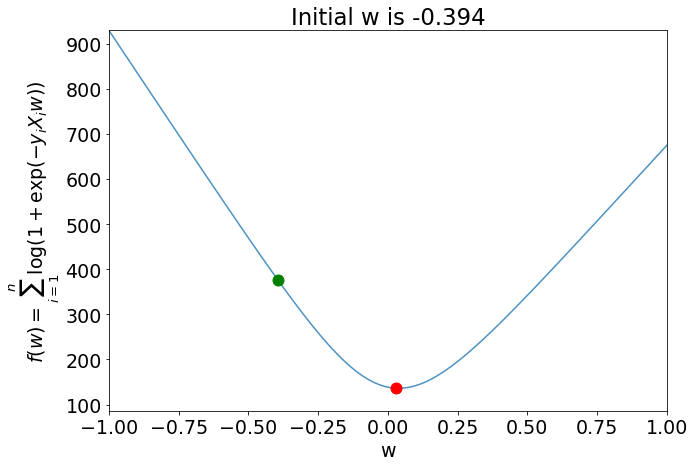

In [319]:
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

plt.plot(w, fw, '-', alpha=0.8)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)
plt.plot(w[30], fw[30], 'o', c="g", ms=11)
plt.title("Initial w is %.3f" % w[30])
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
#plt.legend(loc="lower right")
plt.show()



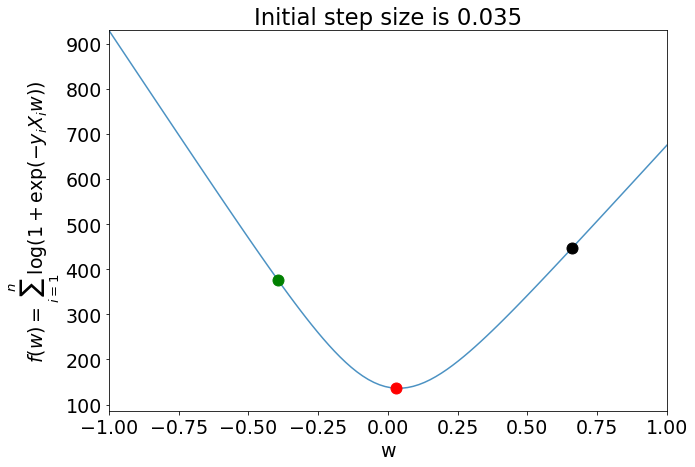

In [321]:

a0 =  0.035

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

plt.plot(w, fw, '-', alpha=0.8)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)
plt.plot(w[30], fw[30], 'o', c="g", ms=11)
plt.plot(w[30]+a0*d0, f(w[30]+a0*d0, X, y), 'o', c="black", ms=11)
plt.title("Initial step size is %.3f" % a0)
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
#plt.legend(loc="lower right")
plt.show()



In [215]:
g(w[i], X, y)

-305.15118865705051

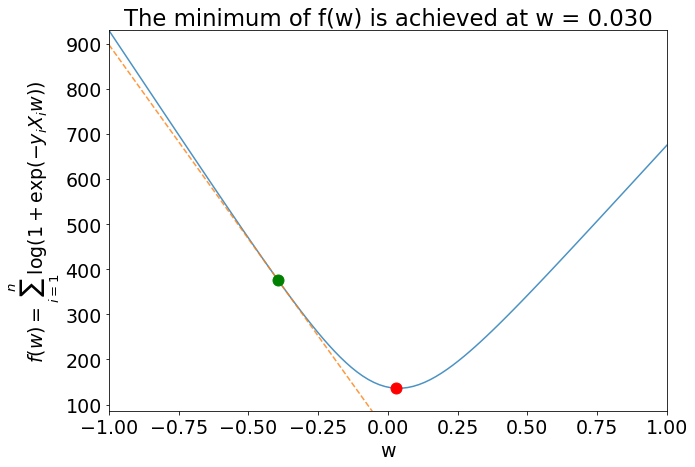

In [322]:
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

gw = np.zeros(nPoints)

for i in range(nPoints):
    w[i] = points[i]
    gw[i] = g(w[i], X, y)

w0 = w[30]
plt.plot(w, fw, '-', alpha=0.8)
plt.plot(w, (w - w0) * g(w0, X ,y ) + f(w0, X, y), '--', alpha=0.8)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)
plt.plot(w0, f(w0, X ,y ), 'o', c="g", ms=11)
plt.title("The minimum of f(w) is achieved at w = %.3f" % w[i])
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
#plt.legend(loc="lower right")
plt.show()

In [88]:
w * g(w0, X ,y )

array([ 2212.8890353 ,  2180.47803428,  2148.06703326,  2115.65603224,
        2083.24503122,  2050.83403019,  2018.42302917,  1986.01202815,
        1953.60102713,  1921.1900261 ,  1888.77902508,  1856.36802406,
        1823.95702304,  1791.54602202,  1759.13502099,  1726.72401997,
        1694.31301895,  1661.90201793,  1629.49101691,  1597.08001588,
        1564.66901486,  1532.25801384,  1499.84701282,  1467.43601179,
        1435.02501077,  1402.61400975,  1370.20300873,  1337.79200771,
        1305.38100668,  1272.97000566,  1240.55900464,  1208.14800362,
        1175.7370026 ,  1143.32600157,  1110.91500055,  1078.50399953,
        1046.09299851,  1013.68199749,   981.27099646,   948.85999544,
         916.44899442,   884.0379934 ,   851.62699237,   819.21599135,
         786.80499033,   754.39398931,   721.98298829,   689.57198726,
         657.16098624,   624.74998522,   592.3389842 ,   559.92798318,
         527.51698215,   495.10598113,   462.69498011,   430.28397909,
      

In [148]:
# Quadratic interpolation
def h(alpha, d, w, X, y):
    return f(w + alpha * d, X, y)
    
def hp(alpha, d, w, X, y):
    return  g(w + alpha * d, X, y) * d

def Q(alpha, d, a0, w, X, y):
    t1 = (h(a0, d, w, X, y) - h(0, d, w, X, y) - a0 * hp(0, d, w, X, y)) 
    t1 /= (a0**2)
    t2 = hp(0., d, w, X, y)
    t3 = h(0., d, w, X, y)
    
    return t1*alpha**2 + t2*alpha + t3

In [164]:
d0 =  - a0 * g(w0, X ,y )

print Q(0, d0, a0, w0, X, y)

print f(w0, X, y)

print Q(a0, d0, a0, w0, X, y)
print f(w0 + a0*d0, X, y)

print h(a0, d0, w0, X, y)

2900.52970077
2900.52970077
3665.11456857
3665.11456857
3665.11456857


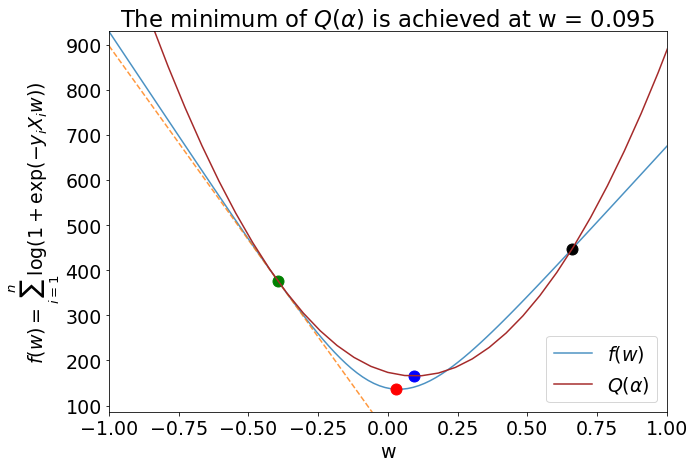

In [326]:
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

points = np.linspace(-0.2,0.2,200)
nPoints = points.size
qw = np.zeros(nPoints)
a = np.zeros(nPoints)


w0 = w[30]
a0 =  0.035
d0 =  - a0 * g(w0, X ,y )

d = - g(w0, X ,y )
for i in range(nPoints):
    a[i] = points[i]*d0 + w0
    qw[i] = Q(points[i], d0, a0, w0, X, y)
    
ba = - hp(0, d0, w0, X, y) * a0**2
ba /= (2 * (h(a0, d0, w0, X, y) - h(0, d0, w0, X, y) - a0 * hp(0, d0, w0, X, y))) 
plt.plot(w, fw, '-', alpha=0.8, label="$f(w)$")
plt.plot(w, (w - w0) * g(w0, X , y) + f(w0, X, y), '--', alpha=0.8)
plt.plot(w0+a0*d0, f(w0+a0*d0, X, y), 'o', c="black", ms=11)
plt.plot(w0+ba*d0, Q(ba, d0, a0, w0, X, y), 'o', c="blue", ms=11)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)
plt.plot(w0, f(w0, X ,y ), 'o', c="g", ms=11)
plt.plot(a, qw, '-', c="brown", label=r"$Q(\alpha)$")

plt.title(r'The minimum of $Q(\alpha )$ is achieved at w = %.3f' % (w0+ba*d0))
# plt.plot(Xtest, ytest, 'o', alpha=0.4, label="Test Data")
plt.legend(loc="lower right")
plt.show()

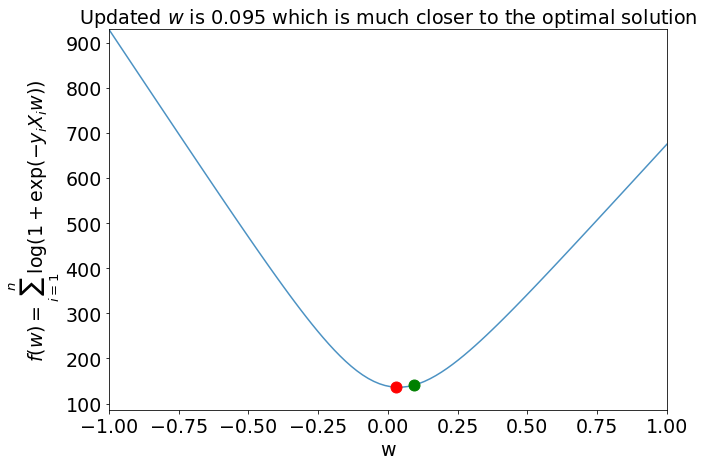

In [327]:
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.rc('font', size=16)  
plt.xlabel("w")
plt.ylabel("$f(w) = \sum_{i=1}^n \log(1 + \exp(-y_iX_iw))$")

points = np.linspace(-0.2,0.2,200)
nPoints = points.size
qw = np.zeros(nPoints)
a = np.zeros(nPoints)


w0 = w[30]
a0 =  0.035
d0 =  - a0 * g(w0, X ,y )

d = - g(w0, X ,y )
for i in range(nPoints):
    a[i] = points[i]*d0 + w0
    qw[i] = Q(points[i], d0, a0, w0, X, y)
    
ba = - hp(0, d0, w0, X, y) * a0**2
ba /= (2 * (h(a0, d0, w0, X, y) - h(0, d0, w0, X, y) - a0 * hp(0, d0, w0, X, y))) 
plt.plot(w, fw, '-', alpha=0.8, label="$f(w)$")


plt.plot(w0+ba*d0, f(w0+ba*d0, X, y), 'o', c="green", ms=11)
i = np.argmin(fw)
plt.plot(w[i], fw[i], 'o', c="r", ms=11)


plt.title(r'Updated $w$ is $0.095$ which is much closer to the optimal solution' % (w0+ba*d0))

plt.show()

In [ ]:
def lineSearch(rule="naive", w, X, y):
    a0 = 1.0
    d = a0 * g(w, X, y)
    while 
        rule == "naive":
            a0 /= 2.0
        rule == "bisection":
            a /= 2.0
        rule == "quadratic":
            ba = - hp(0, d0, w0, X, y) * a0**2
            ba /= (2 * (h(a0, d0, w0, X, y) - h(0, d0, w0, X, y) - a0 * hp(0, d0, w0, X, y))
            a0 = ba